In [1]:
import torch
from ArcMarginProduct import *
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision
import torchvision.models as models
import os
import cv2
import dlib
import time
import numpy as np
import copy
from FaceAligner import FaceAligner

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# f = open("/home/daehyeon/Dlib/lfw_class.txt",'r')
# classes = []
# while True:
#     data=f.readline()
#     classes.append(data.strip())
#     if not data:
#         break
classes  = sorted(os.listdir('/home/daehyeon/hdd/High_Resolution_Files'))+os.listdir('/home/daehyeon/hdd/Total_Face')
num_classes = len(classes)


In [3]:
transforms = transforms.Compose([
        transforms.Resize((300,300)),
        # transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(), # 데이터를 PyTorch의 Tensor 형식으로 바꾼다.
        transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)) # 픽셀값 0 ~ 1 -> -1 ~ 1
])

In [5]:
model = models.resnet50()
model.fc = nn.Linear(2048  , 512)
path = '../easy_margin/403_300'
model.load_state_dict(torch.load(path +'.pth'))
model.to(device)
margin = ArcMarginProduct(in_feature=512,out_feature=num_classes,easy_margin = True)
margin.load_state_dict(torch.load(path+'Margin.pth'))
margin.to(device)
nomargin = ArcMarginForTest(in_feature=512,out_feature=num_classes,easy_margin = True)
nomargin.load_state_dict(torch.load(path+'Margin.pth'))
nomargin.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

32


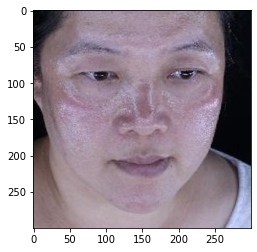

In [13]:
img = Image.open('/home/daehyeon/hdd/403_High/32_36.jpg')
img = transforms(img).unsqueeze(0)

plt.imshow(((img + 1.)/2.)[0].permute(1,2,0))
predict = nomargin(model(img.to(device)))
predicted_label = torch.max(predict, 1)[1]
print(classes[predicted_label])

/home/daehyeon/hdd/lfwtest/Sim_4_Aligned.jpg
/home/daehyeon/hdd/lfwtest/Sim_4_Aligned.jpg
/home/daehyeon/hdd/lfwtest/Sim_4_Aligned.jpg
Sim


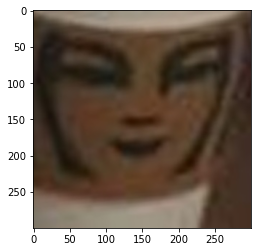

In [19]:

weight='./mmod_human_face_detector.dat'
predictor=dlib.shape_predictor( './shape_predictor_5_face_landmarks.dat' )
path = '/home/daehyeon/hdd/lfwtest/Sim_4'
face_detector=dlib.cnn_face_detection_model_v1( weight )
image = cv2.imread(path+'.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces_cnn=face_detector( image , 1 )
# img = Image.open('/home/daehyeon/hdd/lfw_total/AJ_Cook_0.jpg')

for face in faces_cnn :
    fa = FaceAligner(predictor,desiredLeftEye=(0.3, 0.3), desiredFaceWidth=300)
    faceAligned = fa.align(image,gray,face.rect)
    cv2.imwrite(path+'_Aligned.jpg', faceAligned)
    print(path+'_Aligned.jpg')

model.eval()    
img = Image.open(path+'_Aligned.jpg')
img = transforms(img).unsqueeze(0)
plt.imshow(((img + 1.)/2.)[0].permute(1,2,0))
predict = nomargin(model(img.to(device)))
predicted_label = torch.max(predict, 1)[1]
print(classes[predicted_label])

In [10]:
list =['g','h']
a = ['a']
b = ['c']
list + a +b

['g', 'h', 'a', 'c']

In [2]:
list.append(a)

In [3]:
list

['g', 'h', ['a']]

In [6]:
list.append(('d','c'))

In [7]:
list

['g', 'h', ['a'], ('d', 'c')]

In [11]:
nomargin

NameError: name 'nomargin' is not defined

In [25]:
nomargin.weight[:-3].shape

torch.Size([5453, 512])

In [26]:
nomargin.weight[:].shape

torch.Size([5456, 512])

In [28]:
for p in margin.parameters():
    if p.requires_grad:
         print(p.name, p.data)

None tensor([[ 5.7145e-02, -1.0963e-02, -7.7519e-02,  ..., -2.6655e-02,
          5.3887e-02, -3.6204e-03],
        [ 1.3714e-02, -3.0582e-03, -7.1757e-02,  ..., -5.5824e-02,
          6.4071e-03, -2.1006e-03],
        [ 5.5287e-02,  5.4612e-02, -1.6470e-02,  ..., -4.1147e-02,
         -3.6273e-03, -8.2185e-02],
        ...,
        [-9.5858e-02, -1.6643e-02, -3.4775e-03,  ...,  3.4611e-03,
          7.8635e-03,  8.9494e-04],
        [ 4.6949e-02, -9.4590e-03,  4.3452e-02,  ..., -3.8436e-02,
         -1.3235e-03, -4.3033e-03],
        [-3.9933e-06,  5.2118e-06,  1.1957e-06,  ...,  1.0954e-05,
          1.9831e-07, -4.5551e-06]], device='cuda:0')


In [112]:
margin_copy = ArcMarginProduct(in_feature=512,out_feature=num_classes+3,easy_margin = True)
# margin_copy.weight = margin.weight
margin_copy.weight = torch.nn.Parameter(torch.cat([margin.weight,margin.weight[-3:]]))


tensor([[-9.5858e-02, -1.6643e-02, -3.4775e-03,  ...,  3.4611e-03,
          7.8635e-03,  8.9494e-04],
        [ 4.6949e-02, -9.4590e-03,  4.3452e-02,  ..., -3.8436e-02,
         -1.3235e-03, -4.3033e-03],
        [-3.9933e-06,  5.2118e-06,  1.1957e-06,  ...,  1.0954e-05,
          1.9831e-07, -4.5551e-06],
        [-9.5858e-02, -1.6643e-02, -3.4775e-03,  ...,  3.4611e-03,
          7.8635e-03,  8.9494e-04],
        [ 4.6949e-02, -9.4590e-03,  4.3452e-02,  ..., -3.8436e-02,
         -1.3235e-03, -4.3033e-03],
        [-3.9933e-06,  5.2118e-06,  1.1957e-06,  ...,  1.0954e-05,
          1.9831e-07, -4.5551e-06]], device='cuda:0', grad_fn=<SliceBackward>)

In [58]:
print(margin_copy.weight.shape)

torch.Size([5459, 512])


In [74]:
a = margin.weight

In [80]:
margin_copy.weight[:-3] = a

In [81]:
margin_copy.weight

Parameter containing:
tensor([[ 0.0571, -0.0110, -0.0775,  ..., -0.0267,  0.0539, -0.0036],
        [ 0.0137, -0.0031, -0.0718,  ..., -0.0558,  0.0064, -0.0021],
        [ 0.0553,  0.0546, -0.0165,  ..., -0.0411, -0.0036, -0.0822],
        ...,
        [-0.0308,  0.0026,  0.0095,  ..., -0.0233,  0.0070, -0.0013],
        [-0.0103,  0.0191, -0.0042,  ..., -0.0040,  0.0276,  0.0173],
        [ 0.0098,  0.0071, -0.0084,  ..., -0.0257,  0.0235, -0.0173]],
       grad_fn=<CopySlices>)

In [86]:
a = [1,2,3,4]
a[-3:]

[2, 3, 4]

In [117]:
count = 0
for param in model.parameters():
    count +=1
    print(count)
    param.requires_grad = False
    if count>160:
        param.requires_grad = True
    print(param.shape)

1
torch.Size([64, 3, 7, 7])
2
torch.Size([64])
3
torch.Size([64])
4
torch.Size([64, 64, 1, 1])
5
torch.Size([64])
6
torch.Size([64])
7
torch.Size([64, 64, 3, 3])
8
torch.Size([64])
9
torch.Size([64])
10
torch.Size([256, 64, 1, 1])
11
torch.Size([256])
12
torch.Size([256])
13
torch.Size([256, 64, 1, 1])
14
torch.Size([256])
15
torch.Size([256])
16
torch.Size([64, 256, 1, 1])
17
torch.Size([64])
18
torch.Size([64])
19
torch.Size([64, 64, 3, 3])
20
torch.Size([64])
21
torch.Size([64])
22
torch.Size([256, 64, 1, 1])
23
torch.Size([256])
24
torch.Size([256])
25
torch.Size([64, 256, 1, 1])
26
torch.Size([64])
27
torch.Size([64])
28
torch.Size([64, 64, 3, 3])
29
torch.Size([64])
30
torch.Size([64])
31
torch.Size([256, 64, 1, 1])
32
torch.Size([256])
33
torch.Size([256])
34
torch.Size([128, 256, 1, 1])
35
torch.Size([128])
36
torch.Size([128])
37
torch.Size([128, 128, 3, 3])
38
torch.Size([128])
39
torch.Size([128])
40
torch.Size([512, 128, 1, 1])
41
torch.Size([512])
42
torch.Size([512])
43
t

In [1]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10
